# Insurance Structure and Technical Visualizations

This notebook demonstrates the three new technical visualization functions added for issue #67:
- **Figure B2**: Correlation Structure
- **Figure C4**: Premium Loading Decomposition
- **Figure C5**: Capital Efficiency Frontier (3D)

These visualizations are designed for technical appendix documentation and provide detailed insights into insurance structures, risk correlations, and capital efficiency.

In [2]:
# Import required libraries
import sys
import os

# Add parent directory to path for imports
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Import the new visualization functions
from ergodic_insurance.src.visualization.technical_plots import (
    plot_correlation_structure,
    plot_premium_decomposition,
    plot_capital_efficiency_frontier_3d
)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Figure B2: Risk Correlation Structure

This visualization shows the correlation structure between different risk types, including correlation matrices, copula density plots, and tail dependence analysis.

In [3]:
# Generate synthetic risk data with realistic correlation structure
n_samples = 1000

# Create correlated operational risk data
mean_op = [0, 0, 0]
cov_op = [[1.0, 0.6, 0.3],   # High correlation between first two
          [0.6, 1.0, 0.4],
          [0.3, 0.4, 1.0]]
operational_data = np.random.multivariate_normal(mean_op, cov_op, n_samples)

# Create correlated financial risk data  
mean_fin = [0, 0, 0]
cov_fin = [[1.0, 0.8, 0.5],   # Very high correlation - systemic risk
           [0.8, 1.0, 0.7],
           [0.5, 0.7, 1.0]]
financial_data = np.random.multivariate_normal(mean_fin, cov_fin, n_samples)

# Transform to positive values (loss amounts)
operational_data = np.exp(operational_data) * 10000  # Log-normal losses
financial_data = np.exp(financial_data) * 50000      # Larger financial losses

risk_data = {
    "Operational": operational_data,
    "Financial": financial_data
}

print(f"Generated {n_samples} samples for each risk type")
print(f"Operational loss range: ${operational_data.min():,.0f} - ${operational_data.max():,.0f}")
print(f"Financial loss range: ${financial_data.min():,.0f} - ${financial_data.max():,.0f}")

Generated 1000 samples for each risk type
Operational loss range: $102 - $314,651
Financial loss range: $1,956 - $1,402,703


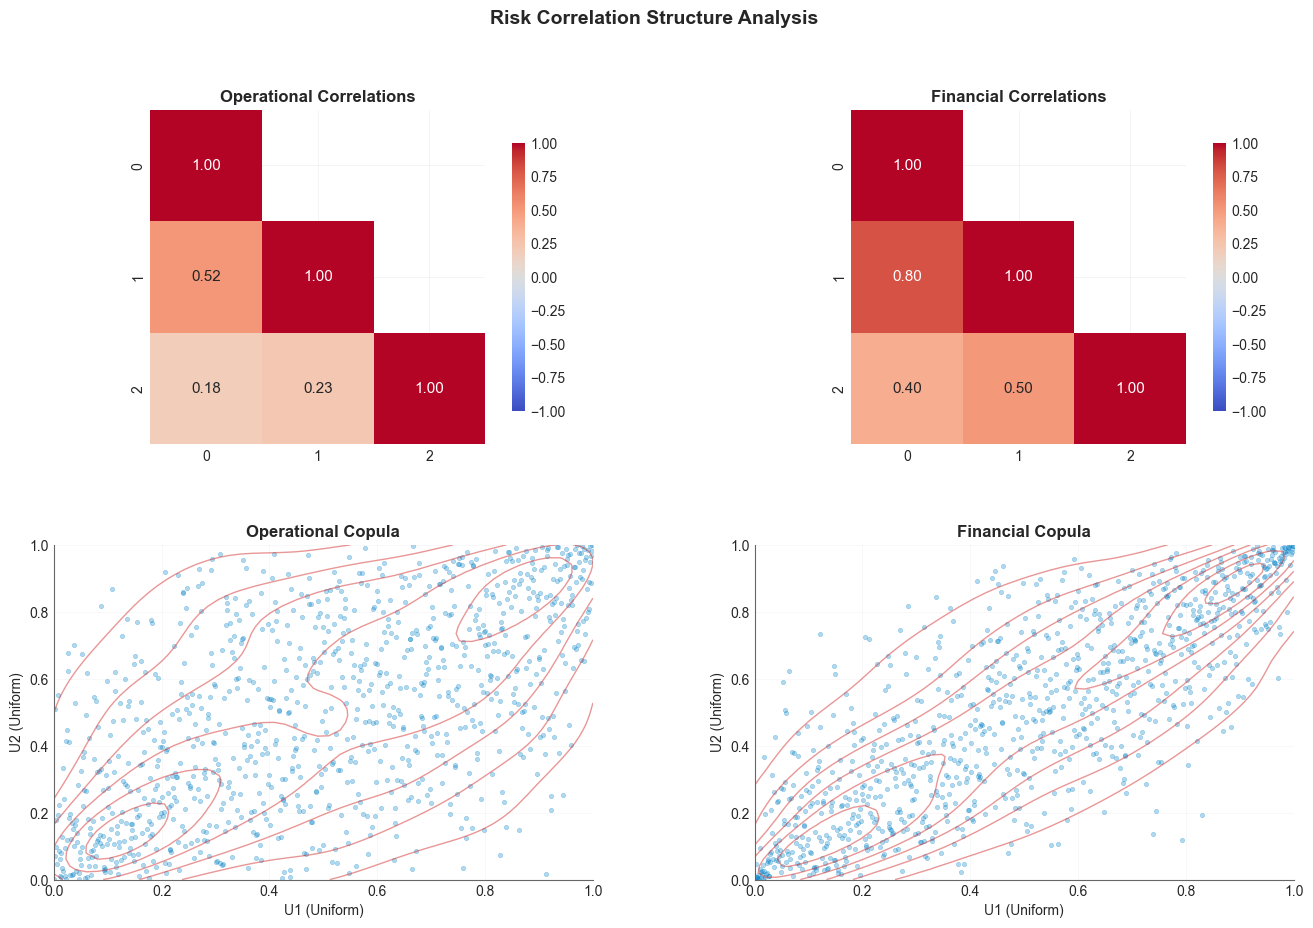


Correlation structure shows:
- Heatmaps reveal the strength of linear relationships
- Copula plots show dependency structure beyond linear correlation
- Useful for understanding tail risk dependencies


In [4]:
# Create correlation structure visualization
fig = plot_correlation_structure(
    risk_data,
    correlation_type="pearson",
    title="Risk Correlation Structure Analysis",
    figsize=(16, 10),
    show_copula=True
)

plt.show()

print("\nCorrelation structure shows:")
print("- Heatmaps reveal the strength of linear relationships")
print("- Copula plots show dependency structure beyond linear correlation")
print("- Useful for understanding tail risk dependencies")

TypeError: tri() missing 1 required positional argument: 'N'

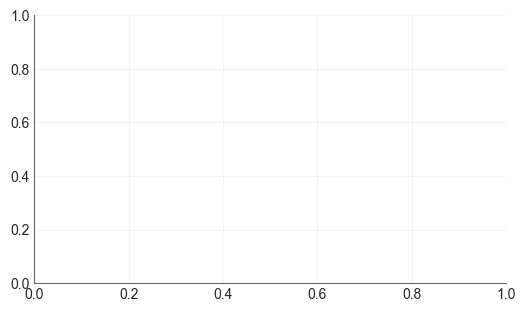

In [5]:
# Try different correlation measures
for corr_type in ["spearman", "kendall"]:
    fig = plot_correlation_structure(
        {"Combined Risk": np.column_stack([operational_data[:, 0], financial_data[:, 0]])},
        correlation_type=corr_type,
        title=f"Risk Correlation - {corr_type.title()} Coefficient",
        figsize=(14, 8)
    )
    plt.show()

## Figure C4: Premium Loading Decomposition

This visualization breaks down insurance premiums into their component parts, showing how much of the premium goes to expected losses, volatility loading, tail risk, expenses, and profit margin.

In [ ]:
# Create realistic premium component data for different company sizes and layers
premium_components = {
    "Small Company": {
        "Primary ($0-5M)": {
            "expected_loss": 250000,      # 50% of premium
            "volatility_load": 75000,     # 15% - higher for small companies
            "tail_load": 50000,          # 10% - catastrophic risk
            "expense_load": 87500,       # 17.5% - fixed costs
            "profit_margin": 37500       # 7.5% - insurer profit
        },
        "Excess ($5-15M)": {
            "expected_loss": 100000,     # Lower frequency in excess layer
            "volatility_load": 40000,    
            "tail_load": 35000,         
            "expense_load": 35000,      # Lower expense ratio
            "profit_margin": 15000      
        },
        "High Excess ($15-25M)": {
            "expected_loss": 30000,      # Rare events
            "volatility_load": 20000,    # High uncertainty
            "tail_load": 25000,         # Significant tail risk
            "expense_load": 15000,      
            "profit_margin": 10000      
        }
    },
    "Medium Company": {
        "Primary ($0-5M)": {
            "expected_loss": 400000,     # Higher exposure
            "volatility_load": 80000,    # 20% of expected
            "tail_load": 60000,         
            "expense_load": 100000,     
            "profit_margin": 60000      
        },
        "Excess ($5-15M)": {
            "expected_loss": 180000,
            "volatility_load": 54000,
            "tail_load": 45000,
            "expense_load": 45000,
            "profit_margin": 26000
        },
        "High Excess ($15-25M)": {
            "expected_loss": 60000,
            "volatility_load": 30000,
            "tail_load": 35000,
            "expense_load": 20000,
            "profit_margin": 15000
        }
    },
    "Large Company": {
        "Primary ($0-10M)": {
            "expected_loss": 800000,     # Much higher exposure
            "volatility_load": 120000,   # Lower relative volatility
            "tail_load": 100000,
            "expense_load": 150000,
            "profit_margin": 80000
        },
        "Excess ($10-25M)": {
            "expected_loss": 300000,
            "volatility_load": 75000,
            "tail_load": 75000,
            "expense_load": 60000,
            "profit_margin": 40000
        },
        "High Excess ($25-50M)": {
            "expected_loss": 100000,
            "volatility_load": 50000,
            "tail_load": 60000,
            "expense_load": 30000,
            "profit_margin": 20000
        }
    }
}

# Calculate total premiums
for company_size, layers in premium_components.items():
    print(f"\n{company_size}:")
    for layer, components in layers.items():
        total = sum(components.values())
        print(f"  {layer}: Total Premium = ${total:,}")

In [ ]:
# Create premium decomposition visualization
fig = plot_premium_decomposition(
    premium_components,
    title="Insurance Premium Loading Decomposition by Company Size and Layer",
    figsize=(16, 10),
    show_percentages=True
)

plt.show()

print("\nKey insights from premium decomposition:")
print("- Expected loss typically represents 40-60% of premium")
print("- Volatility and tail loads increase for higher layers")
print("- Expense ratios decrease with company size (economies of scale)")
print("- Profit margins are generally 5-10% of total premium")

In [ ]:
# Create a focused view for just small companies with custom colors
small_only = {"Small Company": premium_components["Small Company"]}

custom_colors = {
    "expected_loss": "#2E86AB",     # Blue - base cost
    "volatility_load": "#F24236",   # Red - risk charge
    "tail_load": "#F6AE2D",        # Orange - extreme risk
    "expense_load": "#2F4858",     # Dark gray - operations
    "profit_margin": "#86BA90"      # Green - profit
}

fig = plot_premium_decomposition(
    small_only,
    title="Small Company Premium Structure Analysis",
    figsize=(12, 8),
    show_percentages=True,
    color_scheme=custom_colors
)

plt.show()

## Figure C5: Capital Efficiency Frontier (3D)

This 3D visualization shows the relationship between ROE, ruin probability, and insurance spend, helping identify the optimal insurance strategy.

In [ ]:
# Generate efficiency frontier data
def generate_efficiency_surface(n_ruin=25, n_spend=30, company_type="Small"):
    """Generate realistic efficiency surface data."""
    
    # Define ranges based on company size
    if company_type == "Small":
        ruin_range = (0.001, 0.15)  # 0.1% to 15% ruin probability
        spend_range = (0, 1.5e6)     # $0 to $1.5M insurance spend
        base_roe = 0.12              # 12% base ROE
    elif company_type == "Medium":
        ruin_range = (0.001, 0.10)
        spend_range = (0, 3e6)
        base_roe = 0.15
    else:  # Large
        ruin_range = (0.001, 0.05)
        spend_range = (0, 6e6)
        base_roe = 0.18
    
    ruin_probs = np.linspace(ruin_range[0], ruin_range[1], n_ruin)
    insurance_spends = np.linspace(spend_range[0], spend_range[1], n_spend)
    
    # Create ROE surface - higher insurance reduces ruin but costs premium
    roe_surface = np.zeros((n_ruin, n_spend))
    
    for i, ruin in enumerate(ruin_probs):
        for j, spend in enumerate(insurance_spends):
            # Base ROE adjusted for ruin probability
            roe = base_roe * (1 - ruin * 2)  # Ruin reduces effective ROE
            
            # Insurance cost reduces ROE but improves stability
            insurance_drag = spend / 10e6  # Normalize spending impact
            roe -= insurance_drag * 0.5
            
            # But insurance reduces volatility, improving risk-adjusted returns
            stability_bonus = min(spend / spend_range[1], 1) * 0.08 * (1 - ruin)
            roe += stability_bonus
            
            # Add some noise for realism
            roe += np.random.normal(0, 0.005)
            
            roe_surface[i, j] = max(roe, 0)  # ROE can't be negative
    
    return {
        "roe": roe_surface,
        "ruin_prob": ruin_probs,
        "insurance_spend": insurance_spends
    }

# Generate data for three company sizes
efficiency_data = {
    "Small": generate_efficiency_surface(company_type="Small"),
    "Medium": generate_efficiency_surface(company_type="Medium"),
    "Large": generate_efficiency_surface(company_type="Large")
}

print("Generated efficiency surfaces for Small, Medium, and Large companies")

In [ ]:
# Generate optimal paths (simplified - in reality would be from optimization)
def generate_optimal_path(company_type, n_points=20):
    """Generate a plausible optimal insurance path."""
    
    if company_type == "Small":
        # Small company: gradually increase insurance to reduce ruin
        ruin_path = np.linspace(0.10, 0.01, n_points)
        spend_path = np.linspace(0.2e6, 1.0e6, n_points)
        roe_path = np.linspace(0.08, 0.11, n_points)  # ROE improves with stability
    elif company_type == "Medium":
        ruin_path = np.linspace(0.07, 0.005, n_points)
        spend_path = np.linspace(0.5e6, 2.0e6, n_points)
        roe_path = np.linspace(0.11, 0.14, n_points)
    else:
        ruin_path = np.linspace(0.04, 0.002, n_points)
        spend_path = np.linspace(1.0e6, 3.5e6, n_points)
        roe_path = np.linspace(0.14, 0.16, n_points)
    
    # Add some curvature for realism
    t = np.linspace(0, 1, n_points)
    curvature = 0.02 * np.sin(np.pi * t)
    roe_path += curvature
    
    return np.column_stack([ruin_path, spend_path, roe_path])

optimal_paths = {
    "Small": generate_optimal_path("Small"),
    "Medium": generate_optimal_path("Medium"),
    "Large": generate_optimal_path("Large")
}

print("Generated optimal insurance paths for each company size")

In [ ]:
# Create the 3D capital efficiency frontier visualization
fig = plot_capital_efficiency_frontier_3d(
    efficiency_data,
    optimal_paths=optimal_paths,
    title="Capital Efficiency Frontier: ROE vs Ruin vs Insurance Spend",
    figsize=(14, 10),
    view_angles=(25, 45)  # Elevation, azimuth
)

plt.show()

print("\nKey insights from 3D efficiency frontier:")
print("- Optimal paths show trade-off between insurance cost and risk reduction")
print("- Larger companies achieve higher ROE with lower ruin probability")
print("- Surface curvature reveals non-linear relationships")
print("- Sweet spot exists where insurance maximizes risk-adjusted returns")

In [ ]:
# Create multiple viewing angles for comprehensive analysis
figures = plot_capital_efficiency_frontier_3d(
    {"Small": efficiency_data["Small"]},  # Focus on small company
    optimal_paths={"Small": optimal_paths["Small"]},
    title="Small Company Efficiency Analysis",
    figsize=(12, 8),
    export_views=True  # Generate multiple viewing angles
)

print(f"Generated {len(figures)} different viewing angles")

# Display first two views
for i, fig in enumerate(figures[:2]):
    print(f"\nView {i+1}:")
    plt.show()
    
# Close remaining figures to save memory
for fig in figures[2:]:
    plt.close(fig)

In [ ]:
# Create a comparison view with different angles
angles = [(20, 45), (30, 135), (10, 225), (45, 315)]
angle_names = ["Default", "Side View", "Back View", "Top View"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for idx, (ax, (elev, azim), name) in enumerate(zip(axes, angles, angle_names)):
    # Plot surface for small company
    data = efficiency_data["Small"]
    X, Y = np.meshgrid(data["ruin_prob"], data["insurance_spend"])
    Z = data["roe"].T
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    
    # Add optimal path
    path = optimal_paths["Small"]
    ax.plot(path[:, 0], path[:, 1], path[:, 2], 
            color='red', linewidth=3, label='Optimal Path')
    
    ax.set_xlabel('Ruin Probability', fontsize=9)
    ax.set_ylabel('Insurance Spend ($)', fontsize=9)
    ax.set_zlabel('ROE', fontsize=9)
    ax.set_title(f'{name} (elev={elev}°, azim={azim}°)', fontsize=11)
    ax.view_init(elev=elev, azim=azim)

plt.suptitle('Capital Efficiency Frontier - Multiple Perspectives', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary and Conclusions

These three technical visualizations provide comprehensive insights into insurance structures:

1. **Correlation Structure (Figure B2)**:
   - Reveals dependencies between risk types
   - Copula analysis shows tail dependencies beyond linear correlation
   - Critical for understanding systemic risk

2. **Premium Decomposition (Figure C4)**:
   - Transparently shows premium components
   - Highlights how costs vary by company size and layer
   - Useful for insurance buying decisions

3. **Capital Efficiency Frontier (Figure C5)**:
   - 3D visualization reveals complex trade-offs
   - Optimal paths guide insurance strategy
   - Shows that more insurance can actually improve ROE when risk-adjusted

These visualizations are suitable for:
- Technical appendices in research papers
- Actuarial presentations
- Risk committee discussions
- Insurance program design documentation